In [5]:
# Importing Libary# Load libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [6]:
import io
telecom_churn = pd.read_csv('telecom_churn_data.csv')

In [7]:
# Feature type Summary
telecom_churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [8]:
# What is Churn we need to understnd first and then we can move with analyis  ?
# Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
# Dataset is divided into 3 phases:
# Good phase wherein the customer is happy with the service
# Action pase wherein the customer wasn't happy with service or got a better offer from competitor etc. In this phase, the customer usually shows different behaviour than the good phase. Also, it is crucial to identify high-churn-risk customers in this phase, so that some corrective actions can be taken at this point to prevent churn
# Churn phase wherein the customer would have churned

# High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
# After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. 

In [9]:
# Let's first identify high-value customers
telecom_churn['total_data_rech_6'] = telecom_churn['total_rech_data_6'] * telecom_churn['av_rech_amt_data_6']
telecom_churn['total_data_rech_7'] = telecom_churn['total_rech_data_7'] * telecom_churn['av_rech_amt_data_7']

telecom_churn['amt_data_6'] = telecom_churn[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
telecom_churn['amt_data_7'] = telecom_churn[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

telecom_churn['AVG_amt_data_6_7'] = telecom_churn[['amt_data_6','amt_data_7']].mean(axis=1)

In [16]:
telecom_churn.AVG_amt_data_6_7.isnull().sum()

0

In [17]:
telecom_churn[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0))

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.1,195.0,192.0,521.0
0.2,308.0,302.0,573.0
0.3,405.0,400.0,634.5
0.4,494.0,488.0,708.0
0.5,566.0,562.0,800.5
0.6,654.0,652.0,921.0
0.7,760.0,760.0,1094.0
0.8,917.0,920.0,1369.5
0.9,1181.8,1194.8,1992.0


As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile.

But if we use greater than or equal to, we end up getting a little above 30K records as against to 29.9K records.
So, if we conisder only greater than, then we get 29.9K records.
Therefore we have considered greater than to filter high value customers

In [12]:
telecom_churn = telecom_churn [(telecom_churn ['AVG_amt_data_6_7']> telecom_churn ['AVG_amt_data_6_7'].quantile(0.7))]
telecom_churn .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


In [13]:
# feature type summary
telecom_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 231 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [15]:
# CHURN CUSTOMERS
# Identifying churn high value customers based on the last month i.e. month 9
telecom_churn['churn_flag'] = np.where(
                            ((telecom_churn['total_ic_mou_9'] == 0.00) | (telecom_churn['total_og_mou_9'] == 0.00))
                            & ((telecom_churn['vol_2g_mb_9'] == 0.00) | (telecom_churn['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

print(telecom_churn['churn_flag'].value_counts())
print(telecom_churn['churn_flag'].value_counts()/telecom_churn.shape[0])

0    26698
1     3255
Name: churn_flag, dtype: int64
0    0.89133
1    0.10867
Name: churn_flag, dtype: float64


In [21]:
# Let's drop all features related to churn phase i.e. 9th month
telecom_churn= telecom_churn.drop(telecom_churn.filter(regex='_9|sep', axis = 1).columns, axis=1)
telecom_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 177 columns):
mobile_number               29953 non-null int64
circle_id                   29953 non-null int64
loc_og_t2o_mou              29730 non-null float64
std_og_t2o_mou              29730 non-null float64
loc_ic_t2o_mou              29730 non-null float64
last_date_of_month_6        29953 non-null object
last_date_of_month_7        29926 non-null object
last_date_of_month_8        29788 non-null object
arpu_6                      29953 non-null float64
arpu_7                      29953 non-null float64
arpu_8                      29953 non-null float64
onnet_mou_6                 29411 non-null float64
onnet_mou_7                 29417 non-null float64
onnet_mou_8                 28781 non-null float64
offnet_mou_6                29411 non-null float64
offnet_mou_7                29417 non-null float64
offnet_mou_8                28781 non-null float64
roam_ic_mou_6               29

In [23]:
# Check missing values dataset contains
telecom_churn.isna().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                223
std_og_t2o_mou                223
loc_ic_t2o_mou                223
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   542
onnet_mou_7                   536
onnet_mou_8                  1172
offnet_mou_6                  542
offnet_mou_7                  536
offnet_mou_8                 1172
roam_ic_mou_6                 542
roam_ic_mou_7                 536
roam_ic_mou_8                1172
roam_og_mou_6                 542
roam_og_mou_7                 536
roam_og_mou_8                1172
loc_og_t2t_mou_6              542
loc_og_t2t_mou_7              536
loc_og_t2t_mou_8             1172
loc_og_t2m_mou_6              542
loc_og_t2m_mou_7              536
loc_og_t2m_mou_8             1172
loc_og_t2f_mou

In [24]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((telecom_churn.isnull().sum()/len(telecom_churn))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
145,arpu_3g_8,46.80
151,night_pck_user_8,46.80
121,date_of_last_rech_data_8,46.80
127,max_rech_data_8,46.80
130,count_rech_2g_8,46.80
133,count_rech_3g_8,46.80
136,av_rech_amt_data_8,46.80
124,total_rech_data_8,46.80
166,fb_user_8,46.80
148,arpu_2g_8,46.80



We can observe that good amount of missing values in the dataset is pesent.
Let's treat 
Before that let's identify features with single or unique value, because they won't be significant. Drop them

In [25]:
unique_stats = pd.DataFrame(telecom_churn.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])

print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1
13 features with a single unique value.



In [0]:
telecom_churn = telecom_churn.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))

# Missing Value Treatment 

In [27]:
# Start with highest missing feature arpu_3g_8
telecom_churn['arpu_3g_8'].isna().sum()

14018

46% of the data is missing.
How can we impute them? using mean or median etc;
Let's check it

In [28]:
telecom_churn['arpu_3g_8'].describe()

count   15935.00
mean      118.11
std       218.98
min       -24.49
25%         0.00
50%        10.02
75%       179.63
max      3716.90
Name: arpu_3g_8, dtype: float64

We can observe that the range is huge.
So can't go with either mean or median as they can skew/distort the whole scenario.
Let's check data related variables of 8th month to decide on filling up the missing values

In [29]:
# 8 month checking to fill up the misssing values 
telecom_churn[telecom_churn['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [30]:
telecom_churn[telecom_churn['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8
7,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
21,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
38,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
41,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
48,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan


From above observation we can say  that the customers hasn't bought the data at all in 8th month.


In [32]:
# Let's fill the gap as 0
telecom_churn['arpu_3g_8'].fillna(0,inplace=True)
telecom_churn['arpu_3g_8'].isna().sum()

0

It's clearly evident from the above table that most of the missing values are from mobile data related only. We can follow the same approach and fill the gap.

In [33]:
# Let's check the other missing feature 'isd_og_mou_8'
telecom_churn['isd_og_mou_8'].isna().sum()

1172

In [34]:
telecom_churn['isd_og_mou_8'].describe()

count   28781.00
mean        2.03
std        45.65
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      5681.54
Name: isd_og_mou_8, dtype: float64

We can clearly evident the range varies from 0.0 to 5681.54
It looks like the presence of outliers

In [35]:
# Let's check the all outgoing related features of 8th month
telecom_churn[telecom_churn['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].nunique()

loc_og_mou_8      0
std_og_mou_8      0
spl_og_mou_8      0
og_others_8       0
total_og_mou_8    1
dtype: int64

In [36]:

telecom_churn[telecom_churn['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].head()

,loc_og_mou_8,std_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
111,nan,nan,nan,nan,0.00
188,nan,nan,nan,nan,0.00
358,nan,nan,nan,nan,0.00
527,nan,nan,nan,nan,0.00
539,nan,nan,nan,nan,0.00


From the above we can impute the missing values of isd_og_mou_8 with 0

We have carried out the study for the rest of features as well and concluded that the missing values can be imputed with 0 values.

## EDA

We will start with our target variable i.e. 'churn_flag'

In [37]:
telecom_churn['churn_flag'].value_counts()

0    26698
1     3255
Name: churn_flag, dtype: int64

The flags 0 & 1 are Non-churn and churn respectively. We can clearly see that the churn customers are ~11% only. So, we can infer that the dataset is an imbalanced one.

What is an Imbalanced data need to understand ?

Imbalance means that the number of data points available for the classes is different. Let's say if there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

<Figure size 576x288 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Churn status')

Text(0.5, 1.0, 'Churn Status Distribution')

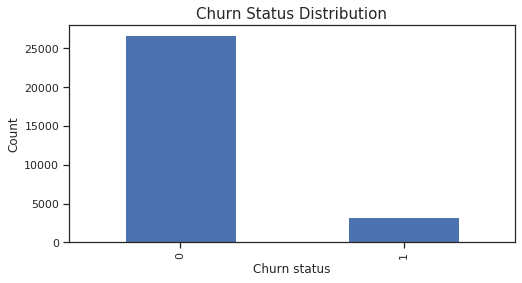

In [41]:
plt.figure(figsize=(8,4))
telecom_churn['churn_flag'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn Status Distribution',fontsize=15)

# Mobile Number

In [42]:
telecom_churn['mobile_number'].value_counts().sort_values(ascending = False).head()

7000883200    1
7000066065    1
7000688705    1
7001669696    1
7001405503    1
Name: mobile_number, dtype: int64

We can infer that the mobile_number is an unique column, means it's repeated multiple times. So we can safely ignore as it's not going to add any value for our analysis

# Averaage Revenue Per User (arpu)

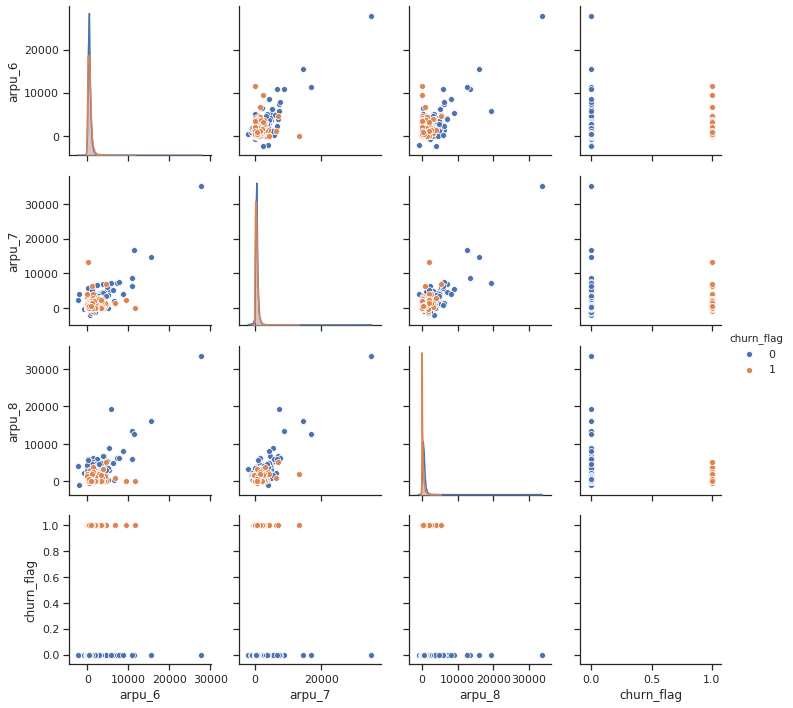

In [44]:
sns.pairplot(data=telecom_churn[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

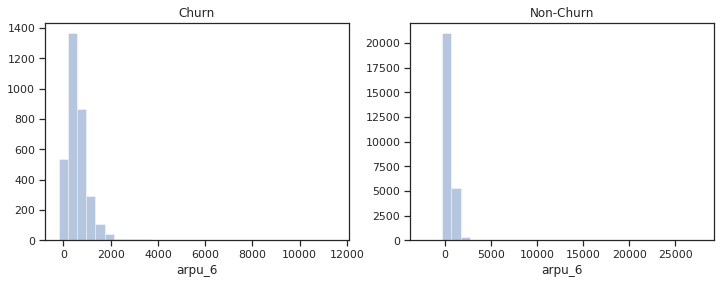

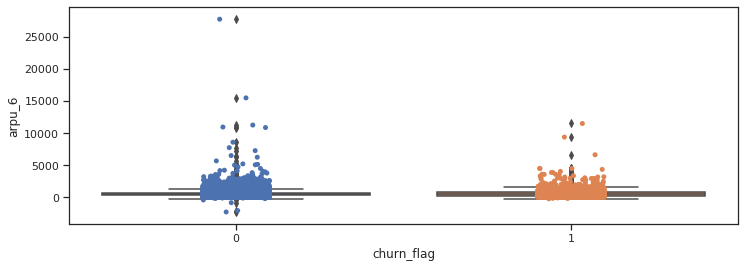

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_churn[telecom_churn['churn_flag']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecom_churn[telecom_churn['churn_flag']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='arpu_6', data=telecom_churn)
sns.stripplot(x='churn_flag', y='arpu_6', data=telecom_churn, jitter=True, edgecolor="gray")

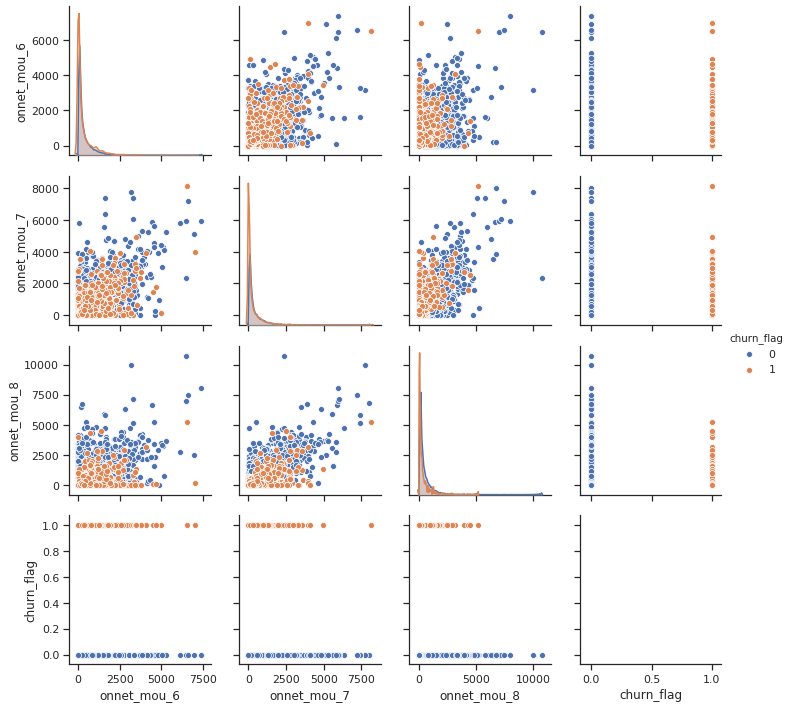

In [49]:
# (On network/ within the same network usage)

sns.pairplot(data=telecom_churn[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')

In [0]:
# Derived Features
telecom_churn['date_of_last_rech_6'] = pd.to_datetime(telecom_churn['date_of_last_rech_6'])
telecom_churn['date_of_last_rech_7'] = pd.to_datetime(telecom_churn['date_of_last_rech_7'])
telecom_churn['date_of_last_rech_8'] = pd.to_datetime(telecom_churn['date_of_last_rech_8'])

telecom_churn['date_of_last_rech_data_6'] = pd.to_datetime(telecom_churn['date_of_last_rech_data_6'])
telecom_churn['date_of_last_rech_data_7'] = pd.to_datetime(telecom_churn['date_of_last_rech_data_7'])
telecom_churn['date_of_last_rech_data_8'] = pd.to_datetime(telecom_churn['date_of_last_rech_data_8'])

telecom_churn['mobile_number'] = telecom_churn['mobile_number'].astype(str)

Create new features from the date columns
This may help us identifying if a particular day in a month or a week causing any issue

In [0]:
# Now let's create new features from date column
telecom_churn['date_of_last_rech_day_6'] = telecom_churn['date_of_last_rech_6'].dt.day
telecom_churn['date_of_last_rech_dayofwk_6'] = telecom_churn['date_of_last_rech_6'].dt.dayofweek.astype(str)

telecom_churn['date_of_last_rech_day_7'] = telecom_churn['date_of_last_rech_7'].dt.day
telecom_churn['date_of_last_rech_dayofwk_7'] = telecom_churn['date_of_last_rech_7'].dt.dayofweek.astype(str)

telecom_churn['date_of_last_rech_day_8'] = telecom_churn['date_of_last_rech_8'].dt.day
telecom_churn['date_of_last_rech_dayofwk_8'] = telecom_churn['date_of_last_rech_8'].dt.dayofweek.astype(str)

telecom_churn['date_of_last_rech_data_day_6'] = telecom_churn['date_of_last_rech_data_6'].dt.day
telecom_churn['date_of_last_rech_data_dayofwk_6'] = telecom_churn['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

telecom_churn['date_of_last_rech_data_day_7'] = telecom_churn['date_of_last_rech_data_7'].dt.day
telecom_churn['date_of_last_rech_data_dayofwk_7'] = telecom_churn['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

telecom_churn['date_of_last_rech_data_day_8'] = telecom_churn['date_of_last_rech_data_8'].dt.day
telecom_churn['date_of_last_rech_data_dayofwk_8'] = telecom_churn['date_of_last_rech_data_8'].dt.dayofweek.astype(str)

In [54]:
telecom_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 176 columns):
mobile_number                       29953 non-null object
arpu_6                              29953 non-null float64
arpu_7                              29953 non-null float64
arpu_8                              29953 non-null float64
onnet_mou_6                         29411 non-null float64
onnet_mou_7                         29417 non-null float64
onnet_mou_8                         28781 non-null float64
offnet_mou_6                        29411 non-null float64
offnet_mou_7                        29417 non-null float64
offnet_mou_8                        28781 non-null float64
roam_ic_mou_6                       29411 non-null float64
roam_ic_mou_7                       29417 non-null float64
roam_ic_mou_8                       28781 non-null float64
roam_og_mou_6                       29411 non-null float64
roam_og_mou_7                       29417 non-null float64
roam_o

In [56]:
pd.options.display.float_format = '{:.2f}'.format
telecom_churn.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7,churn_flag,date_of_last_rech_day_6,date_of_last_rech_day_7,date_of_last_rech_day_8,date_of_last_rech_data_day_6,date_of_last_rech_data_day_7,date_of_last_rech_data_day_8
count,29953.00,29953.00,29953.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29953.00,29953.00,29953.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29953.00,29953.00,29953.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29411.00,29417.00,28781.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,16740.00,17038.00,29953.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,16740.00,17038.00,15935.00,29953.00,29953.00,29953.00,29953.00,16740.00,17038.00,29953.00,29953.00,29953.00,29953.00,29880.00,29855.00,29371.00,16740.00,17038.00,15935.00
mean,558.82,561.16,508.89,265.71,272.94,243.89,380.69,385.12,348.77,16.42,12.88,13.02,27.09,20.52,20.70,8

In [57]:
# Let's check the correlation between features
joincorr= telecom_churn.corr()
telecom_churn_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
telecom_churn_corr[((telecom_churn_corr[0] < 1) & (telecom_churn_corr[0] >= 0.4)) | ((telecom_churn_corr[0] <= -0.4) & (telecom_churn_corr[0] > -1))]

,level_0,level_1,0
22441,sachet_2g_8,count_rech_2g_8,0.99
18067,count_rech_2g_8,sachet_2g_8,0.99
17903,count_rech_2g_7,sachet_2g_7,0.99
22277,sachet_2g_7,count_rech_2g_7,0.99
22113,sachet_2g_6,count_rech_2g_6,0.98
17739,count_rech_2g_6,sachet_2g_6,0.98
25254,amt_data_7,total_data_rech_7,0.97
24930,total_data_rech_7,amt_data_7,0.97
25090,amt_data_6,total_data_rech_6,0.97
24766,total_data_rech_6,amt_data_6,0.97


From the above we can notice high correlation between same features and only month differs.
How can we take care of those?
We can eliminate as we will lose information of eith good or action month.
Let's create new features from good month and compare them with action phase

# Feature Selection

There are several ways for feature selection: To begin with all feature selection starts with some business domain knowledge. Variables that are relevant, available prior to modeling should be used.

In [0]:
# Let's drop date related features as we derived new features out of it
telecom_churn.drop(list(telecom_churn.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

In [0]:
# Since we have the good data for both month 6, 7 as average, we dont need the raw columns, so dropping them

telecom_churn.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [63]:
telecom_churn.shape

(29953, 84)

In [64]:
correlation_matrix = telecom_churn.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  24
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('std_og_mou_8', 'total_og_mou_8'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_rech_data_6', 'count_rech_2g_6'), ('total_rech_data_7', 'count_rech_2g_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('count_rech_2g_8', 'sachet_2g_8'), ('count_rech_3g_8', 'sachet_3g_8'), ('av_rech_amt_data_8', 'arpu_3g_8'), ('av_rech_amt_data_8', 'arpu_2g_8'), ('arpu_3g_8', 'arpu_2g_8'), ('arpu_3g_8', 'monthly_3g_8'), ('arpu_2g_8', 'monthly_3g_8'), ('total_data_rech_6', 'amt_data_6'), ('total_data_rech_6', 'AVG_amt_data_6_7'), ('total_data_rech_7', 'amt_data_7'), ('total_data_rech_7', 'AVG_amt_data_6_7'), ('amt_data_6', 'AVG_amt_data_6_7'), ('amt_data_7', 'AVG_amt_data_6_7')]


In [0]:
corr_matrix = telecom_churn.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [0]:
telecom_churn.drop(columns=to_drop, axis=1,inplace=True)

In [67]:
telecom_churn.shape

(29953, 70)

In [68]:
telecom_churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 70 columns):
mobile_number                       29953 non-null object
arpu_8                              29953 non-null float64
onnet_mou_8                         28781 non-null float64
offnet_mou_8                        28781 non-null float64
roam_ic_mou_8                       28781 non-null float64
roam_og_mou_8                       28781 non-null float64
loc_og_t2t_mou_8                    28781 non-null float64
loc_og_t2m_mou_8                    28781 non-null float64
loc_og_t2f_mou_8                    28781 non-null float64
loc_og_t2c_mou_8                    28781 non-null float64
loc_og_mou_8                        28781 non-null float64
std_og_t2f_mou_8                    28781 non-null float64
std_og_mou_8                        28781 non-null float64
isd_og_mou_8                        28781 non-null float64
spl_og_mou_8                        28781 non-null float64
og_othe

In [0]:
telecom_churn.drop(columns = list(telecom_churn.select_dtypes(include=['category']).columns), axis =1, inplace = True)

In [91]:
list(telecom_churn.select_dtypes(include=[object]).columns)

['mobile_number',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [0]:
telecom_churn.drop(columns = list(telecom_churn.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [93]:
telecom_churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 63 columns):
arpu_8                          29953 non-null float64
onnet_mou_8                     28781 non-null float64
offnet_mou_8                    28781 non-null float64
roam_ic_mou_8                   28781 non-null float64
roam_og_mou_8                   28781 non-null float64
loc_og_t2t_mou_8                28781 non-null float64
loc_og_t2m_mou_8                28781 non-null float64
loc_og_t2f_mou_8                28781 non-null float64
loc_og_t2c_mou_8                28781 non-null float64
loc_og_mou_8                    28781 non-null float64
std_og_t2f_mou_8                28781 non-null float64
std_og_mou_8                    28781 non-null float64
isd_og_mou_8                    28781 non-null float64
spl_og_mou_8                    28781 non-null float64
og_others_8                     28781 non-null float64
loc_ic_t2t_mou_8                28781 non-null float64
loc_ic_t2m_

In [0]:
telecom_churn.replace([np.inf, -np.inf], np.nan,inplace=True)
telecom_churn.fillna(0,inplace=True)

In [95]:
telecom_churn.isnull().values.any()

False

In [96]:
telecom_churn.shape

(29953, 63)

# Model Building

In [0]:
X = telecom_churn[telecom_churn.columns[~telecom_churn.columns.isin(['churn_flag'])]]
Y = telecom_churn['churn_flag']

# Feature Scaling

In [0]:
# We will now train different models on this dataset.
# Scaling all values will reduce the distortion due to exceptionally high values and make algorithms converge faster.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.8,test_size=0.2,random_state=111)

In [100]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (23962, 62)
Training dataset target size (23962,)
Test dataset size (5991, 62)
Test dataset target size (5991,)


# PCA 


In observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing

In [0]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [102]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [103]:
pca.components_

array([[ 3.68445400e-02, -6.53618631e-02, -6.13075835e-02, ...,
         1.72897737e-01,  1.89533910e-01,  1.95584694e-01],
       [ 2.53701890e-01,  9.15038872e-02,  1.70014496e-01, ...,
        -1.32400762e-01, -1.25042275e-01, -8.01291991e-02],
       [ 2.32042997e-01,  2.08192348e-01,  2.36530812e-01, ...,
         1.69886376e-02,  5.08609238e-02,  1.05686695e-01],
       ...,
       [ 6.66421428e-07,  1.87650276e-05,  1.76393814e-05, ...,
         3.55822122e-07,  2.73028464e-07,  1.21529296e-06],
       [ 8.14321264e-07,  1.43127424e-05,  1.51949575e-05, ...,
         4.57818407e-07,  3.22780250e-07, -1.70876688e-07],
       [ 4.67437662e-07,  8.20910317e-07,  9.77568653e-07, ...,
         2.33155827e-07,  1.76221003e-07, -6.59000851e-08]])

In [105]:
colnames = list(X.columns)
pcs_telecom_churn = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_telecom_churn.head(10)

,PC1,PC2,Feature
0,0.04,0.25,arpu_8
1,-0.07,0.09,onnet_mou_8
2,-0.06,0.17,offnet_mou_8
3,-0.00,0.03,roam_ic_mou_8
4,-0.01,0.03,roam_og_mou_8
5,-0.01,0.13,loc_og_t2t_mou_8
6,-0.02,0.22,loc_og_t2m_mou_8
7,0.01,0.15,loc_og_t2f_mou_8
8,-0.00,-0.00,loc_og_t2c_mou_8
9,-0.02,0.23,loc_og_mou_8


Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.036844540009470385, 0.25370189001642895, 'arpu_8')

Text(-0.06536186310933259, 0.09150388721558833, 'onnet_mou_8')

Text(-0.061307583526791665, 0.1700144964666252, 'offnet_mou_8')

Text(-0.0023644505573046093, 0.02662694712662811, 'roam_ic_mou_8')

Text(-0.011467485862032445, 0.03498978283391374, 'roam_og_mou_8')

Text(-0.012095876859232996, 0.12691317454497783, 'loc_og_t2t_mou_8')

Text(-0.01654405200788367, 0.21690003449246112, 'loc_og_t2m_mou_8')

Text(0.00603953567961012, 0.1478886654408354, 'loc_og_t2f_mou_8')

Text(-0.0015122266072361617, -0.001206040774862754, 'loc_og_t2c_mou_8')

Text(-0.017883532640859037, 0.22683166723976453, 'loc_og_mou_8')

Text(-0.001311304586398601, 0.06778878692957122, 'std_og_t2f_mou_8')

Text(-0.08534602372324918, 0.05610275872595292, 'std_og_mou_8')

Text(0.0037438794255356548, 0.08436151509794332, 'isd_og_mou_8')

Text(-0.008702395771172714, 0.005937186885657498, 'spl_og_mou_8')

Text(-0.0017900895688520884, 0.010031655861206641, 'og_others_8')

Text(0.004033802778290443, 0.10166317591325, 'loc_ic_t2t_mou_8')

Text(0.006047140875141442, 0.16868062806421075, 'loc_ic_t2m_mou_8')

Text(0.015495638983219998, 0.1033077676181549, 'loc_ic_t2f_mou_8')

Text(0.008470970215446277, 0.18448390620975502, 'loc_ic_mou_8')

Text(-0.001348515894899736, 0.04602289602862538, 'std_ic_t2t_mou_8')

Text(-0.005403250852167229, 0.06371341090710518, 'std_ic_t2m_mou_8')

Text(0.005571958146611196, 0.048910725749194466, 'std_ic_t2f_mou_8')

Text(-0.00391689660706658, 0.07809939715080523, 'std_ic_mou_8')

Text(-0.014262712496356756, -0.02922930682535063, 'spl_ic_mou_8')

Text(0.010402226717081357, 0.04171304496208437, 'isd_ic_mou_8')

Text(-0.003309636187769864, 0.019121783052733855, 'ic_others_8')

Text(-0.016623104740533187, -0.05841428114464579, 'total_rech_num_8')

Text(0.0631945845335375, 0.2456135351078603, 'max_rech_amt_6')

Text(0.06898144585828352, 0.25363318128726264, 'max_rech_amt_7')

Text(0.08548702002913108, 0.2848630608965377, 'max_rech_amt_8')

Text(0.04094328422334069, 0.20789318475043228, 'last_day_rch_amt_6')

Text(0.03645605001328348, 0.2175452773905334, 'last_day_rch_amt_7')

Text(0.0524128519766363, 0.2393345584068806, 'last_day_rch_amt_8')

Text(0.14470914377875416, -0.2084536560636386, 'total_rech_data_6')

Text(0.15564687630396168, -0.2151144097926645, 'total_rech_data_7')

Text(0.16143748402334546, -0.17345311202320426, 'total_rech_data_8')

Text(0.20800235237985443, 0.08021258965775063, 'max_rech_data_6')

Text(0.22150899236310276, 0.08535856411607719, 'max_rech_data_7')

Text(0.2424515787036774, 0.11515491142969886, 'max_rech_data_8')

Text(0.18299625947825718, -0.058185874239501265, 'count_rech_3g_6')

Text(0.19614015604231202, -0.05619829104959571, 'count_rech_3g_7')

Text(0.20051278724764815, -0.02526450282191915, 'count_rech_3g_8')

Text(0.2353287576405031, -0.001037310708771887, 'av_rech_amt_data_6')

Text(0.2584545586010909, 0.004110560515942533, 'av_rech_amt_data_7')

Text(0.27732546846454875, 0.046491702014202024, 'av_rech_amt_data_8')

Text(0.07354269105790455, -0.06823471436736593, 'vol_2g_mb_8')

Text(0.2431615338405546, 0.07008260103262269, 'vol_3g_mb_8')

Text(0.24214039418322195, 0.11401808920554651, 'arpu_3g_8')

Text(0.04394380021915141, -0.04147440577809954, 'night_pck_user_8')

Text(0.06623091286952225, 0.013504769909925858, 'monthly_2g_8')

Text(0.21148951328569907, 0.10795453567864528, 'monthly_3g_8')

Text(0.2214497997426673, -0.05310773098328849, 'fb_user_8')

Text(0.003972188979583469, 0.12034239174647557, 'aon')

Text(0.1836712145564662, 0.0795834631158353, 'aug_vbc_3g')

Text(0.15771600662843266, -0.10531056527746711, 'total_data_rech_6')

Text(0.1912897037470423, -0.11268455095755048, 'total_data_rech_7')

Text(-0.05238089569871734, -0.07247074021217578, 'date_of_last_rech_day_6')

Text(-0.024016232372730033, -0.04316148165084297, 'date_of_last_rech_day_7')

Text(-0.0028728259754039216, -0.019477034268235927, 'date_of_last_rech_day_8')

Text(0.17289773710004566, -0.13240076157339398, 'date_of_last_rech_data_day_6')

Text(0.18953391022245078, -0.12504227517200686, 'date_of_last_rech_data_day_7')

Text(0.19558469414198096, -0.08012919913325268, 'date_of_last_rech_data_day_8')

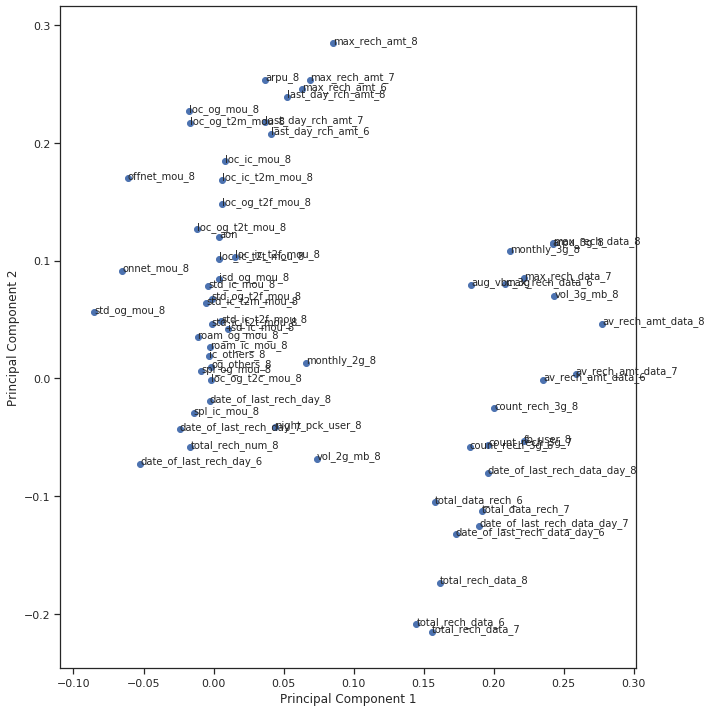

In [107]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_telecom_churn.PC1, pcs_telecom_churn.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_telecom_churn.Feature):
    plt.annotate(txt, (pcs_telecom_churn.PC1[i],pcs_telecom_churn.PC2[i]))
plt.tight_layout()
plt.show()

In [108]:
pca.explained_variance_ratio_

array([1.59012819e-01, 9.06579081e-02, 6.50125308e-02, 4.55464120e-02,
       3.66557817e-02, 3.45291689e-02, 3.19797082e-02, 2.54516869e-02,
       2.41163169e-02, 2.31300840e-02, 2.28007647e-02, 2.16312055e-02,
       2.05362201e-02, 1.98415771e-02, 1.92330726e-02, 1.83990782e-02,
       1.80218896e-02, 1.67704822e-02, 1.67150703e-02, 1.58055888e-02,
       1.48783729e-02, 1.47502323e-02, 1.44156424e-02, 1.35155926e-02,
       1.32130153e-02, 1.31316677e-02, 1.28425301e-02, 1.25133145e-02,
       1.18905053e-02, 1.17327188e-02, 1.09731247e-02, 1.06803664e-02,
       9.82322843e-03, 9.08177384e-03, 8.60068834e-03, 8.57068518e-03,
       7.83026760e-03, 6.69756254e-03, 6.53870942e-03, 6.28865739e-03,
       6.15354050e-03, 5.86827053e-03, 5.40220044e-03, 4.65041738e-03,
       4.57256292e-03, 3.73537299e-03, 3.59850163e-03, 3.36303863e-03,
       3.19325343e-03, 2.95741903e-03, 2.56601833e-03, 2.23435833e-03,
       2.05016220e-03, 1.52063450e-03, 1.43228688e-03, 1.20506239e-03,
      

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

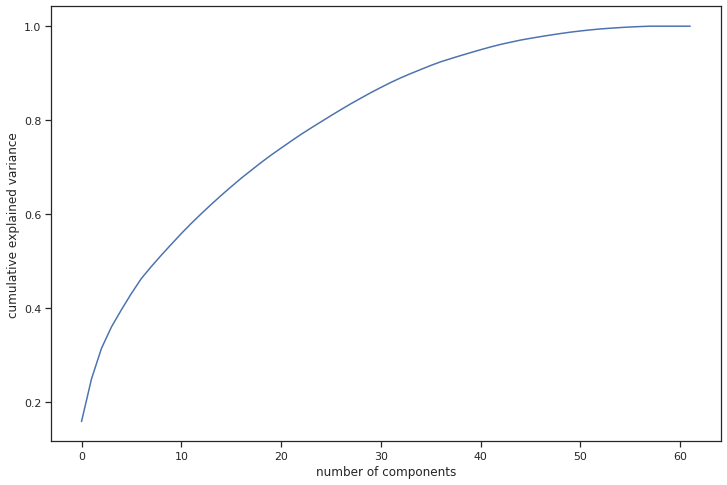

In [109]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [110]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [15.9  9.1  6.5  4.6  3.7  3.5  3.2  2.5  2.4  2.3  2.3  2.2  2.1  2.
  1.9  1.8  1.8  1.7  1.7  1.6  1.5  1.5  1.4  1.4  1.3  1.3  1.3  1.3
  1.2  1.2  1.1  1.1  1.   0.9  0.9  0.9  0.8  0.7  0.7  0.6  0.6  0.6
  0.5  0.5  0.5  0.4  0.4  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.1  0.1
  0.1  0.1  0.   0.   0.   0. ]


In [111]:
print (pca.explained_variance_ratio_.cumsum())

[0.15901282 0.24967073 0.31468326 0.36022967 0.39688545 0.43141462
 0.46339433 0.48884602 0.51296233 0.53609242 0.55889318 0.58052439
 0.60106061 0.62090218 0.64013526 0.65853433 0.67655622 0.69332671
 0.71004178 0.72584737 0.74072574 0.75547597 0.76989161 0.78340721
 0.79662022 0.80975189 0.82259442 0.83510773 0.84699824 0.85873096
 0.86970408 0.88038445 0.89020768 0.89928945 0.90789014 0.91646082
 0.92429109 0.93098865 0.93752736 0.94381602 0.94996956 0.95583783
 0.96124003 0.96589045 0.97046301 0.97419839 0.97779689 0.98115993
 0.98435318 0.9873106  0.98987662 0.99211098 0.99416114 0.99568177
 0.99711406 0.99831912 0.99924461 0.99999797 1.         1.
 1.         1.        ]


In [0]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54)

In [113]:
telecom_churn_train_pca = pca_final.fit_transform(X_train)
telecom_churn_train_pca.shape

(23962, 54)

In [0]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(telecom_churn_train_pca.transpose())

<Figure size 1440x720 with 0 Axes>

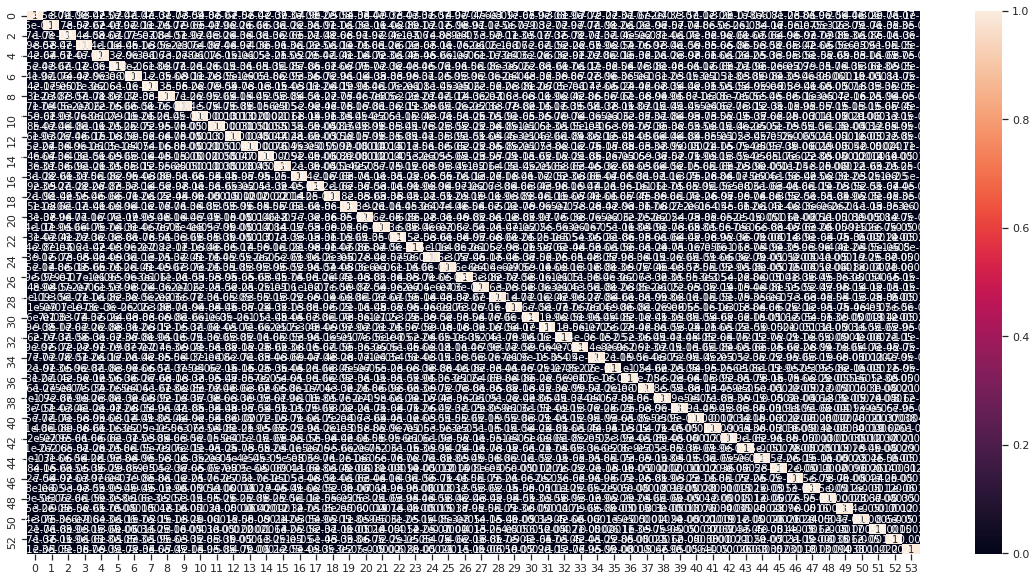

In [115]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [117]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.002325298083286038 , min corr:  -0.00202080872207092


In [118]:
#Applying selected components to the test data
telecom_churn_test_pca = pca_final.transform(X_test)
telecom_churn_test_pca.shape

(5991, 54)

# Logistic Regression

Logistic Regression is a classification algorithm. It is used to predict a binary outcome or Multi class outcome, given a set of independent variables. Logistic regression is a special case of linear regression when the outcome variable is categorical, where we are using log of odds as dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

In [0]:
# Let's first fit a model with default hyperparameters.
#Training the model on the train data
from sklearn.linear_model import LogisticRegression

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(telecom_churn_train_pca,y_train)

In [143]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(telecom_churn_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [144]:
#Let's build couple of more models with different number of components. Let's see if the results changes
pca_last1 = PCA(n_components=48)
telecom_churn_train_pca1 = pca_last1.fit_transform(X_train)
telecom_churn_test_pca1 = pca_last1.transform(X_test)
telecom_churn_test_pca1.shape

(5991, 48)

In [145]:
#training the regression model
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(telecom_churn_train_pca1,y_train)
#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(telecom_churn__test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

'0.88'

In [146]:
pca_last2 = PCA(n_components=15)
telecom_churn_train_pca2 = pca_last2.fit_transform(X_train)
telecom_churn_test_pca2 = pca_last2.transform(X_test)
telecom_churn_test_pca2.shape

(5991, 15)

In [147]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(telecom_churn_train_pca2,y_train)
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(telecom_churn_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.87'


# Choice of Evaluation Metric
Accuracy = correct predictions / total predictions = (TP + TN)/ (all)
Recall(sensitivity) = ability to identify Positives as true = TP/(TP + FN) 
Precision = TP/ (TP + FP) = Positive predictive value:
F Score = 2 Precision Recall/ (Precision * Recall)
Area under the Curve:

AUC or in the classification world – AUC ROC – Area under the curve for Receiver Operating Characteristic curve is generally used to compare two different models. It used two metrics from the confusion matrix the true positive rate and false positive rate.

True positive rate (TPR), recall as described above is proportion of positive data points correctly identified as positive by the model False positive rate (FPR), which is defined as FP/(FP+TN) is all the negative data points that are mistakenly identified as positive as a proportion of all negative data points.

The TPR and FPR metrics are calculated for several threshold values and a curve is plotted with these. The resulting curve is called ROC. AUC is the computation of the area under ROC curve. For a model selection, we always look for maximizing the AUC for the classifier. As this value is comparable across models.

# Logistic Regression - with penalty

In [0]:
from sklearn.feature_selection import RFE

In [0]:
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',C=10000000,n_jobs=-1)

In [150]:
logmodel_CW_dict.fit(telecom_churn_train_pca,y_train)

LogisticRegression(C=10000000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=9999, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      5339
           1       0.32      0.83      0.47       652

    accuracy                           0.79      5991
   macro avg       0.65      0.81      0.67      5991
weighted avg       0.90      0.79      0.83      5991

Accuracy for the test dataset 79.3%
ROC for the test dataset 81.1%


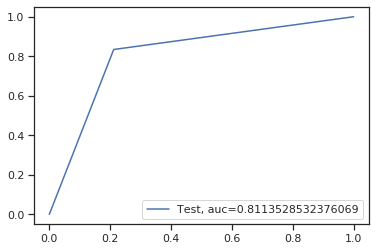

In [151]:
predictions = logmodel_CW_dict.predict(telecom_churn_test_pca)
prediction_probs = logmodel_CW_dict.predict_proba(telecom_churn_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Train Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff73a1f7358>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff73a1a3748>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 4209')

Text(1, 0, 'FP = 1130')

Text(0, 1, 'FN = 108')

Text(1, 1, 'TP = 544')

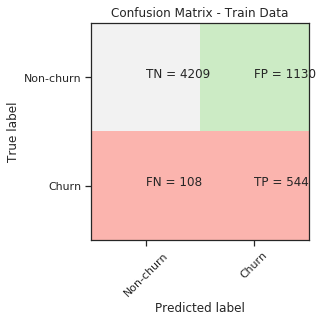

In [152]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

# Lift Metric

What is Lift measure?

Lift measures expected benefit with the predictive model compared to a base line model – in essence a random choice. It is the ratio of proportion of the gain to the proportion of random expectation at any given decile level. The random expectation at the xth decile is x%.

In [0]:
def plotLiftChart(actual, predicted,title_str):
    telecom_churn_dict = {'actual': list (actual), 'pred': list(predicted)}
    telecom_churn = pd.DataFrame( telecom_churn_dict)
    pred_ranks = pd.qcut( telecom_churn['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(telecom_churn['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = telecom_churn.groupby(pred_ranks).mean()
    actual_percentiles = telecom_churn.groupby(actual_ranks).mean()
    plt.title(title_str)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 4

    plt.legend(loc="best")
    plt.show()

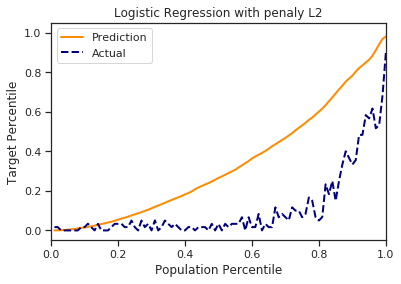

In [156]:
plotLiftChart(y_test.values,prediction_probs,"Logistic Regression with penaly L2")

# Create Stratefied Kfold Samples :
The regular K-Fold cross validation may not be applicable for an imbalanced dataset. As the folds created may not retain class proportions, even if they did, most classifiers need some manipulation of the dataset to balance it (oversampling of positive class or under sampling of negative class).
To Cross validate an imbalanced dataset, we might have to apply stratified cross validation. Stratification seeks to ensure that each fold is representative of all classes of the data.

Random Sampling: The given dataset is highly imbalanced. Churn classes is only 10% of the entire dataset. With such a dataset random sampling might not be able to pick up enough data of both the classes
Stratified Sampling: Stratified sampling will be able to sample enough data of both the classes. But, considering that the churn class is only 10% of the entire dataset, stratified sampling might significantly reduce the number of cases, so it should ideally be coupled with a resampling technique to ensure balance in data.

In [0]:
from sklearn.model_selection  import StratifiedKFold
stratefied_Kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)

In [0]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [159]:
searchCV.fit(telecom_churn_train_pca,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

In [160]:
print("final selected 1/lambda is ", searchCV.C_)
print("final selected lambda is ", 1/searchCV.C_)

final selected 1/lambda is  [1.]
final selected lambda is  [1.]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5339
           1       0.68      0.33      0.45       652

    accuracy                           0.91      5991
   macro avg       0.80      0.66      0.70      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.1%
ROC for the test dataset 87.9%


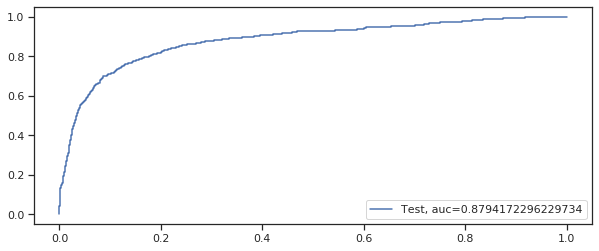

In [161]:
#train data
preds_L2Search = searchCV.predict(telecom_churn_test_pca)
preds_L2Search_probs = searchCV.predict_proba(telecom_churn_test_pca)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Test Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff73a148390>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff73a13c978>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 5237')

Text(1, 0, 'FP = 102')

Text(0, 1, 'FN = 434')

Text(1, 1, 'TP = 218')

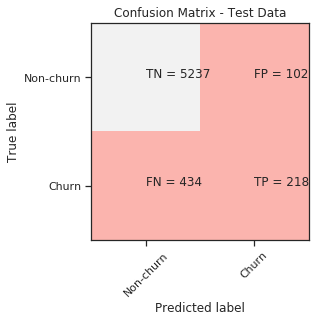

In [162]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

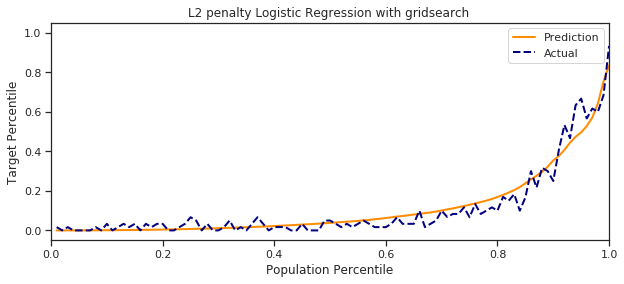

In [163]:
plotLiftChart(y_test.values,preds_L2Search_probs,"L2 penalty Logistic Regression with gridsearch ")


# Random Forest


Random forest algorithm is based on a concept called bagging - bootstrap aggregating. In random forest, we build a number of decision trees on bootstrap training samples. The samples are chosen, as split candidates from all the X variables (predictors).
So, the random forest at each split is allowed to consider a subset of the predictors. If not, One or Few strong predictors, might always become the most important predictor leading to similar looking trees. Which leads to no reduction in the variance. This process can be thought of as de-correlating the trees or feature bagging. Because of this, the Random forest can also be used to rank the importance of variables.
Similarly bootstrapping of sample rows is also done.

Let's first fit a random forest model with default hyperparameters.

In [0]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [0]:
TrainedRFC= RFC_balanced.fit(telecom_churn_train_pca,y_train)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5339
           1       0.38      0.73      0.50       652

    accuracy                           0.84      5991
   macro avg       0.67      0.79      0.70      5991
weighted avg       0.90      0.84      0.86      5991

Accuracy for the test dataset 84.0%
ROC for the test dataset 86.4%


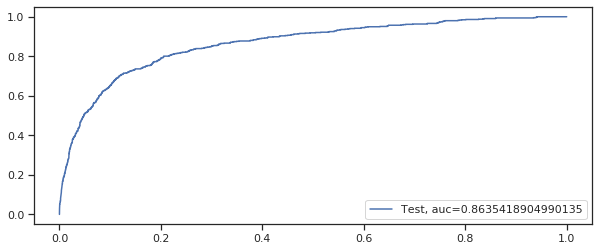

In [166]:
preds_RFC=TrainedRFC.predict(telecom_churn_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(telecom_churn_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Test Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff784c779b0>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff784c69860>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 4558')

Text(1, 0, 'FP = 781')

Text(0, 1, 'FN = 176')

Text(1, 1, 'TP = 476')

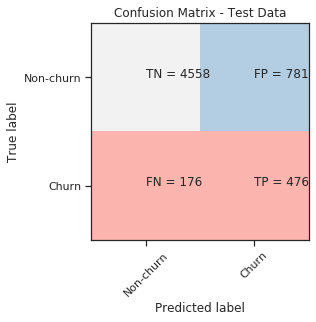

In [167]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

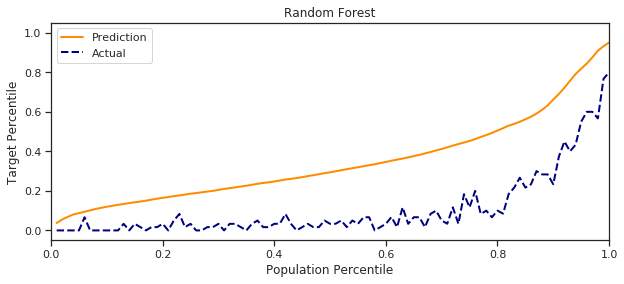

In [168]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest")

In [169]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance 

,colName,value
0,0.17,offnet_mou_8
1,0.13,roam_og_mou_8
2,0.11,onnet_mou_8
3,0.10,roam_ic_mou_8
4,0.05,std_og_mou_8
5,0.05,loc_ic_t2m_mou_8
6,0.03,std_ic_t2m_mou_8
7,0.03,std_ic_t2t_mou_8
8,0.03,arpu_8
9,0.02,spl_ic_mou_8


# Gradient boosting

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set.

Gradient boosting uses the concept of boosting. It also fits separate decision trees to the training data set but the trees are grown sequentially essentially to fix the mistakes of the previous tree. This is why, boosting is called the ensemble of weak prediction models. Suppose the gradient boosting model starts with a weak model Fm. In the next iteration it tries to add to the previous weak model, in such a way, that the prediction becomes stronger, i.e;

                      Fm+1(x) =  Fm (x) + h(x)= y
Here h is essentially a residual from the previous model, so gradient boosting is a generalization of the gradient decent algorithm that reduces the residuals.

In [0]:
from sklearn import ensemble

# Fit classifier with out-of-bag estimates
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [172]:
GBC.fit(telecom_churn_train_pca,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=9999, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5339
           1       0.68      0.29      0.41       652

    accuracy                           0.91      5991
   macro avg       0.80      0.64      0.68      5991
weighted avg       0.89      0.91      0.89      5991

Accuracy for the test dataset 90.8%
ROC for the test dataset 86.7%


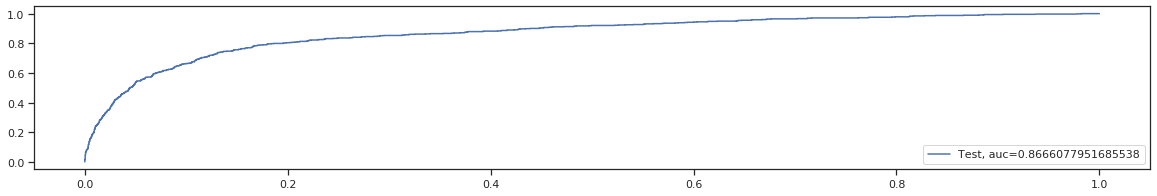

In [173]:
preds_GBC = GBC.predict(telecom_churn_test_pca)
preds_probs_GBC = GBC.predict_proba(telecom_churn_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = metrics.accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Test Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff784a83668>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff784aa0e48>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 5250')

Text(1, 0, 'FP = 89')

Text(0, 1, 'FN = 460')

Text(1, 1, 'TP = 192')

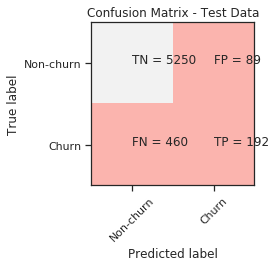

In [174]:
cm = confusion_matrix(y_test, preds_GBC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

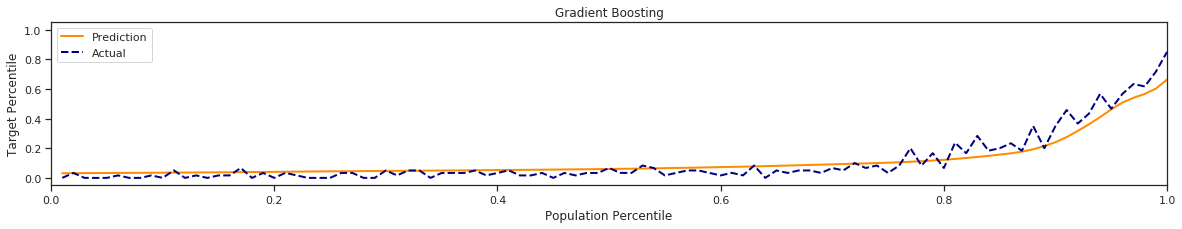

In [175]:
plotLiftChart(y_test.values,preds_probs_GBC,"Gradient Boosting")

# Gradient Boosting with Hyperparameter tuning
Let's now try to tune hyperparameters in gradient boosting classifier. Start with with two hyperparameters - n_estimators and max_depth.

n_estimators: integer, optional (default=10): The number of trees in the forest
max_depth : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

In [0]:
# Change in estimators & max_depth
from sklearn.model_selection import GridSearchCV   

# Fit classifier with out-of-bag estimates
param_test = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=None,verbose=2)

In [186]:
gsearch1.fit(telecom_churn_train_pca,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  4.3min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6646           0.0251           10.95s
         2           0.5801           0.0179           10.39s
         3           0.6027           0.0165           10.12s
         4           0.6129           0.0129           10.16s
         5           0.5929           0.0131           10.08s
         6           0.5472           0.0104            9.88s
         7           0.5357           0.0099            9.78s
         8           0.5615           0.0082            9.55s
         9           0.5455           0.0070            9.55s
        10           0.5432           0.0069            9.57s
        11           0.5284           0.0065            9.43s
        12           0.5493           0.0067            9.40s
        13           0.5084           0.0048            9.26s
        14           0.5203           0.0049            9.27s
        15           0.5010           0.0051            9.24s
       

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pr

In [188]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'n_estimators': 200}, 0.8851197952450849)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5339
           1       0.62      0.44      0.52       652

    accuracy                           0.91      5991
   macro avg       0.78      0.71      0.73      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.0%
ROC for the test dataset 89.0%


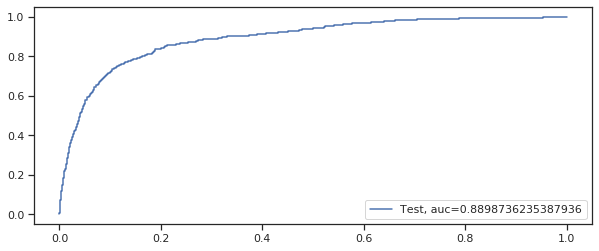

In [189]:
preds_GBC_HT = gsearch1.predict(telecom_churn_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(telecom_churn_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Test Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff784885d68>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff78488bdd8>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 5159')

Text(1, 0, 'FP = 180')

Text(0, 1, 'FN = 362')

Text(1, 1, 'TP = 290')

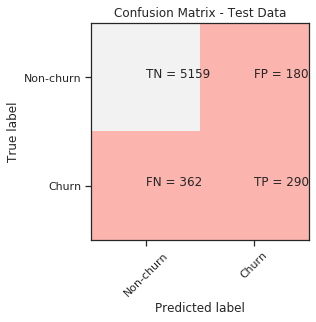

In [190]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

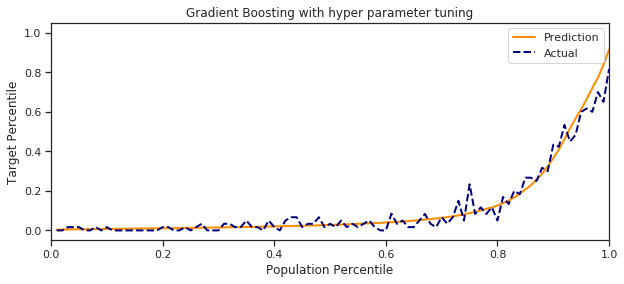

In [191]:
plotLiftChart(y_test.values,preds_GBC_probs_HT,"Gradient Boosting with hyper parameter tuning")

# Model Building

On original features (instead of principal components)
We have tuned the hyperparameters using GPU enabled one and identified the best ones.
Below is the code for the same.

Note: The time taken to complete this step is nearly 18hrs. Please make sure the availabilty of the resources for the same
Currently we are making this as a markdown. Chnage them to code to get those parameters

XGBoost - Finding the best hyperparameters
Now it's time to look for the optimal hyperparameters - what does this mean?

We will test our chosen model with different values for (almost) each of its tuning parameters and give back the parameters with which the model performed best.

**The actual searching for optimal parameters is not done in this notebook since the operations can take some time and parallel editing would not be possible.

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(params): params = { 'max_depth': int(params['max_depth']), 'gamma': "{:.3f}".format(params['gamma']), 'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']), }

clf = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    **params
)
score = cross_val_score(clf, X_train, y_train, scoring='f1_weighted', cv=StratifiedKFold()).mean()
print("F1 score {:.3f} params {}".format(score, params))
return score

space = { 'max_depth': hp.quniform('max_depth', 2, 8, 1), 'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 'gamma': hp.uniform('gamma', 0.0, 0.5), }

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

In [0]:
#print("estimated optimum {}".format(best))

# The result we got with tuning is
# estimated optimum {'colsample_bytree': 0.552933848345107, 'gamma': 0.22715962641133935, 'max_depth': 8.0}

In [199]:
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 145655 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.5) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 14.5MB/s 


In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [201]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 145711 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

# Random Forest
from sklearn.model_selection import cross_val_score def acc_model(params): clf = RandomForestClassifier(**params) return cross_val_score(clf, X_train, y_train).mean()

param_space = { 'max_depth': hp.choice('max_depth', range(1,20)), 'max_features': hp.choice('max_features', range(1,100)), 'n_estimators': hp.choice('n_estimators', range(100,500)), 'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0 def f(params): global best acc = acc_model(params) if acc > best: best = acc print ('new best:', best, params) return {'loss': -acc, 'status': STATUS_OK}

trials = Trials() best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials) print ('best:') print (best)

In [0]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [213]:

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [214]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8923917502733494
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [215]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5201  138]
 [ 333  319]]


NameError: ignored

In [217]:
# 2)Choose best feature
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

8


In [218]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [219]:
# OOB score
rf_model.oob_score_

0.9220015023787664

In [0]:
# SVM

In [225]:

from sklearn import svm 

svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5339
           1       0.72      0.19      0.30       652

    accuracy                           0.90      5991
   macro avg       0.82      0.59      0.62      5991
weighted avg       0.89      0.90      0.88      5991

Accuracy for the test dataset 90.4%
ROC for the test dataset 58.9%


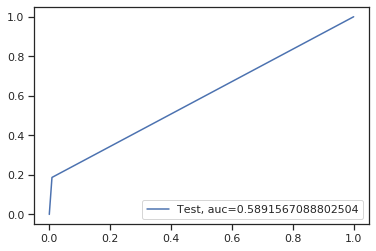

In [226]:
preds_SVM_lin = svm_linear.predict(X_test)
#preds_SVM_lin_probs = svm_linear.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_lin))
accuracy = metrics.accuracy_score(y_test, preds_SVM_lin)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_lin)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Test Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff73899cda0>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff7389b3828>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 5292')

Text(1, 0, 'FP = 47')

Text(0, 1, 'FN = 530')

Text(1, 1, 'TP = 122')

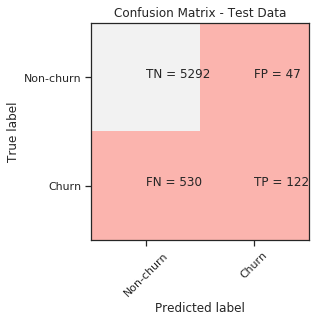

In [227]:
cm = confusion_matrix(y_test, preds_SVM_lin)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

In [0]:
# SVM with Non linear kernal

In [229]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5339
           1       0.71      0.38      0.50       652

    accuracy                           0.92      5991
   macro avg       0.82      0.68      0.73      5991
weighted avg       0.90      0.92      0.90      5991

Accuracy for the test dataset 91.6%
ROC for the test dataset 68.1%


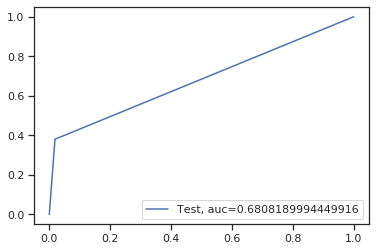

In [230]:
preds_SVM_rbf = svm_rbf.predict(X_test)
#preds_SVM_rbf_probs = svm_rbf.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_rbf))
accuracy = metrics.accuracy_score(y_test, preds_SVM_rbf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_rbf)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Test Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff72a7f4e48>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff72a807898>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 5239')

Text(1, 0, 'FP = 100')

Text(0, 1, 'FN = 404')

Text(1, 1, 'TP = 248')

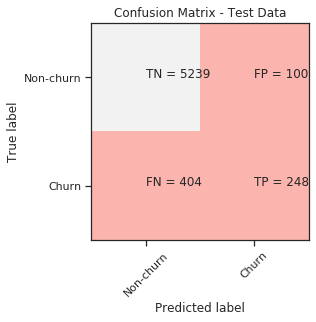

In [231]:
cm = confusion_matrix(y_test, preds_SVM_rbf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

# Ada Boost(Adaptive Boost)

In [232]:

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)
# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

0.9218828242363545

In [233]:
# adaboost with the tree as base estimator

estimators = list(range(50, 100, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

In [234]:
abc_scores

[0.9190452345184443,
 0.9193790686029043,
 0.9177098981806042,
 0.9172091470539142,
 0.9165414788849942,
 0.9180437322650643,
 0.9187114004339844,
 0.9192121515606744,
 0.9187114004339844,
 0.9188783174762143,
 0.9197129026873644,
 0.9192121515606744,
 0.9197129026873644,
 0.9202136538140544,
 0.9217159071941246,
 0.9223835753630446,
 0.9218828242363545]

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5339
           1       0.71      0.48      0.57       652

    accuracy                           0.92      5991
   macro avg       0.82      0.73      0.77      5991
weighted avg       0.91      0.92      0.92      5991

Accuracy for the test dataset 92.2%
ROC for the test dataset 72.9%


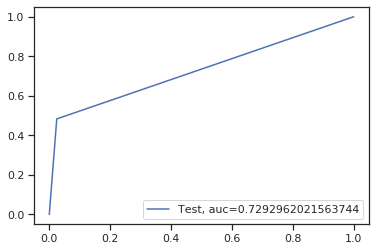

In [235]:
#after seseing the above score we can say that adaboost is providing better results when estimate is 1
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 1)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Classification Report:")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

Accuracy for the test dataset 92.2%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5339
           1       0.65      0.60      0.63       652

    accuracy                           0.92      5991
   macro avg       0.80      0.78      0.79      5991
weighted avg       0.92      0.92      0.92      5991

ROC for the test dataset 78.1%


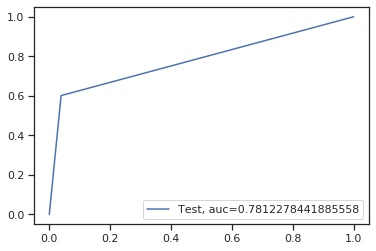

In [236]:
# Let's test on 100 trees
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 100)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [0]:
# Naive Bayes

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5339
           1       0.00      0.00      0.00       652

    accuracy                           0.89      5991
   macro avg       0.45      0.50      0.47      5991
weighted avg       0.79      0.89      0.84      5991

Accuracy for the test dataset 89.1%
ROC for the test dataset 50.0%


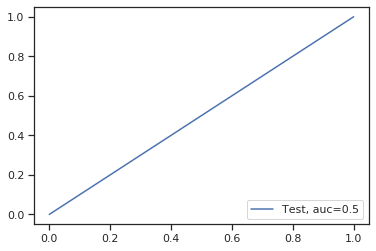

In [239]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
Minmaxscaler = MinMaxScaler()
X_scaled = Minmaxscaler.fit_transform(X)

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_scaled,Y, train_size=0.8,test_size=0.2,random_state=111)

mnb = MultinomialNB()

# fit
mnb.fit(X_train_NB,y_train_NB)

# predict class
predictions = mnb.predict(X_test_NB)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_NB)
accuracy = metrics.accuracy_score(y_test_NB, predictions)
print("Classification Report:")
print(classification_report(y_test_NB,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test_NB, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Resampling techniques for Balancing the data set
Resampling Techniques:
Random under sampling

Balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.
Random Over sampling

Increase the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.
Cluster based over sampling

the K-means clustering algorithm is independently applied to minority and majority class instances. This is to identify clusters in the dataset. Subsequently, each cluster is oversampled such that all clusters of the same class have an equal number of instances and all classes have the same size.
Synthetic Minority Over sampling Technique (SMOTE)

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.
Modified Synthetic Minority Oversampling Technique (MSMOTE)

While the basic flow of MSOMTE is the same as that of SMOTE (discussed in the previous section). In MSMOTE the strategy of selecting nearest neighbors is different from SMOTE. The algorithm randomly selects a data point from the k nearest neighbors for the security sample, selects the nearest neighbor from the border samples and does nothing for latent noise.
Algorithmic Ensemble Technique:
Bagging Based

Bagging is an abbreviation of Bootstrap Aggregating. The conventional bagging algorithm involves generating ‘n’ different bootstrap training samples with replacement. Algorithmic Ensemble Technique:
Bagging Based

Bagging is an abbreviation of Bootstrap Aggregating. The conventional bagging algorithm involves generating ‘n’ different bootstrap training samples with replacement. And training the algorithm on each bootstrapped algorithm separately and then aggregating the predictions at the end
Bagging is used for reducing Overfitting in order to create strong learners for generating accurate predictions. Unlike boosting, bagging allows replacement in the bootstrapped sample.
Boosting Based

Boosting is an ensemble technique to combine weak learners to create a strong learner that can make accurate predictions.
Boosting starts out with a base classifier / weak classifier that is prepared on the training data.
Different Boosting Methods:
- Ada Boost
- Gradient Tree Boosting
- XG Boost

In [0]:
# Random Over Sampling

In [241]:
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (23962, 62)
Number transactions y_train dataset:  (23962,)
Number transactions X_test dataset:  (5991, 62)
Number transactions y_test dataset:  (5991,)


In [242]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2603
Before OverSampling, counts of label '0': 21359 

After OverSampling, the shape of train_X: (42718, 62)
After OverSampling, the shape of train_y: (42718,) 

After OverSampling, counts of label '1': 21359
After OverSampling, counts of label '0': 21359


In [0]:
# Logistic Regression with penalty

In [0]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [245]:
searchCV.fit(X_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.0s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      5339
           1       0.33      0.82      0.47       652

    accuracy                           0.80      5991
   macro avg       0.65      0.81      0.68      5991
weighted avg       0.90      0.80      0.83      5991

Accuracy for the test dataset 80.1%
ROC for the test dataset 88.0%


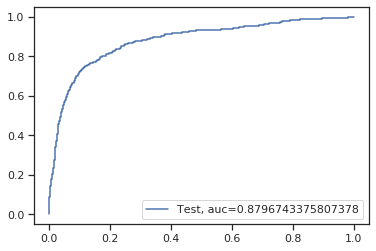

In [246]:
#train data
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Train Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff7849d50f0>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff784a9a358>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 4266')

Text(1, 0, 'FP = 1073')

Text(0, 1, 'FN = 118')

Text(1, 1, 'TP = 534')

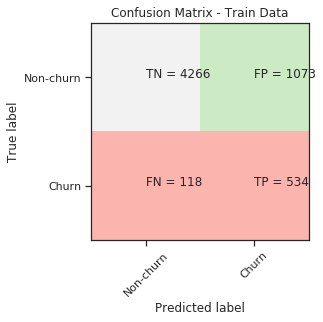

In [247]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

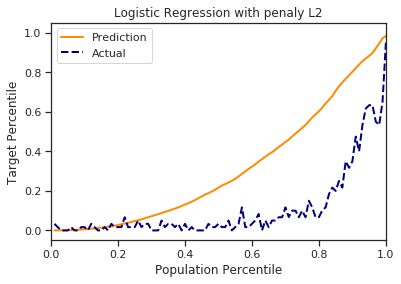

In [248]:
plotLiftChart(y_test.values,preds_L2Search_probs,"Logistic Regression with penaly L2")

In [0]:
# Random Forest
# On resampled dataset

TrainedRFC= RFC_balanced.fit(X_train_res,y_train_res)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      5339
           1       0.45      0.78      0.57       652

    accuracy                           0.87      5991
   macro avg       0.71      0.83      0.75      5991
weighted avg       0.91      0.87      0.89      5991

Accuracy for the test dataset 87.1%
ROC for the test dataset 91.1%


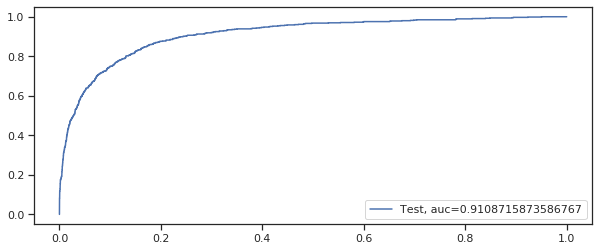

In [250]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Test Data')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

([<matplotlib.axis.XTick at 0x7ff73a1055f8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7ff73a034b00>,
 <a list of 2 Text yticklabel objects>)

Text(0, 0, 'TN = 4714')

Text(1, 0, 'FP = 625')

Text(0, 1, 'FN = 145')

Text(1, 1, 'TP = 507')

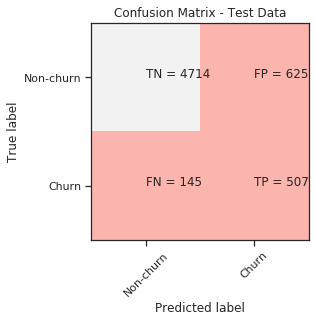

In [251]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

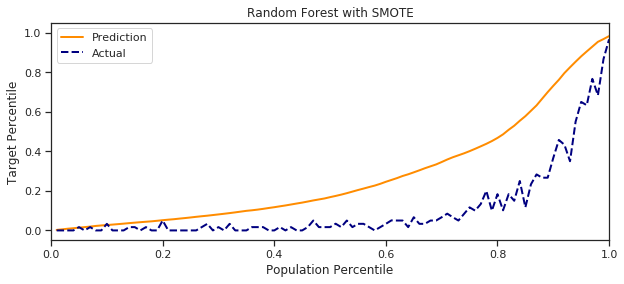

In [252]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with SMOTE")

In [253]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,colName,value
0,0.24,loc_ic_mou_8
1,0.07,loc_og_mou_8
2,0.07,loc_og_t2t_mou_8
3,0.06,arpu_8
4,0.06,roam_og_mou_8
5,0.06,date_of_last_rech_day_8
6,0.05,loc_ic_t2t_mou_8
7,0.05,max_rech_amt_8
8,0.05,offnet_mou_8
9,0.04,roam_ic_mou_8


In [0]:
# XG Boost
# On Resampled data

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
    cv = None,
    scoring='f1_weighted'
)

xgb_model1 = xgb_model.fit(X_train_res,y_train_res)

In [256]:
predictions_train = xgb_model1.predict(X_train_res)
print(classification_report(y_train_res, predictions_train))
predictions = xgb_model1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21359
           1       0.98      0.99      0.99     21359

    accuracy                           0.99     42718
   macro avg       0.99      0.99      0.99     42718
weighted avg       0.99      0.99      0.99     42718

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5339
           1       0.65      0.63      0.64       652

    accuracy                           0.92      5991
   macro avg       0.80      0.79      0.80      5991
weighted avg       0.92      0.92      0.92      5991



In [257]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,fbeta_score
accuracy = accuracy_score(y_test, predictions)
precision_recall_fscore_support(y_test, predictions, average='macro')
precision, recall, f1score,blah  = precision_recall_fscore_support(y_test, predictions, average='macro')
fbetascore = fbeta_score(y_test, predictions, average='weighted', beta=0.8)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))
print("F1 Score: %.2f%%" % (f1score*100))
print("F Beta score: %.2f%%" % (fbetascore*100))
print("Specificity: %.2f%%" % (specificity*100))
print("Sensitivty: %.2f%%" % (sensitivity*100))

(0.8000994282946361, 0.79401903690519, 0.7970151075103546, None)

Accuracy: 92.20%
Precision: 80.01%
Recall: 79.40%
F1 Score: 79.70%
F Beta score: 92.16%
Specificity: 95.77%
Sensitivty: 63.04%


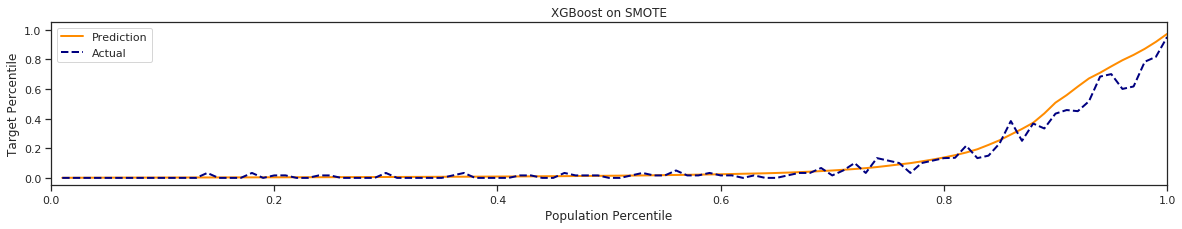

In [259]:
plotLiftChart(y_test.values,xgb_model1.predict_proba(X_test)[:,1],"XGBoost on SMOTE")

In [260]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
loc_ic_mou_8,0.14
loc_og_mou_8,0.07
loc_ic_t2m_mou_8,0.07
date_of_last_rech_day_8,0.06
roam_og_mou_8,0.05
fb_user_8,0.04
last_day_rch_amt_8,0.03
max_rech_data_8,0.03
date_of_last_rech_day_6,0.03


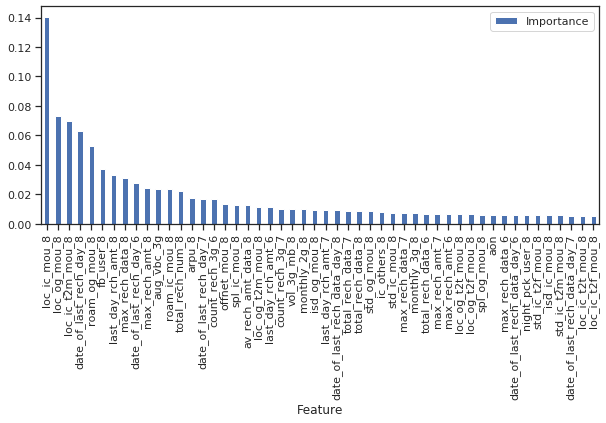

In [261]:
importances[0:50].plot.bar()

# Summary about the models
We trained different machine learning models to solve this classification problems.
Both XGBoost and Random Forest Classifier performed the best when compared with other models.
The Algorithmic Ensemble Techniques was able to provide the same performance of the models using the resampling techniques data (the performance is almost the same). So, with balanced class option & stratified K-fold we can still get the same scores without increasing the dataset size
We considered F1-score and Area under the curve as the primary metrics for the evaluation

Important features or indicators

In [0]:
importances = RF2.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head()